In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fire_data = pd.read_csv("Fire-Incidents.csv")
print(fire_data)

        _id     call_no  incident_type                     type_description  \
0         1  F160029985          111.0                        Building fire   
1         2  F180022058          111.0                        Building fire   
2         3  F180022102          131.0               Passenger vehicle fire   
3         4  F170043431          131.0               Passenger vehicle fire   
4         5  F180021111          111.0                        Building fire   
...     ...         ...            ...                                  ...   
9761  12509  F240025074          111.0                        Building fire   
9762  12510  F240026212          111.0                        Building fire   
9763  12511  F240026245          111.0                        Building fire   
9764  12512  F240026266          111.0                        Building fire   
9765  12513  F240026288          113.0  Cooking fire, confined to container   

                                             addres

In [2]:
fire_data = fire_data.drop(columns=["_id", "call_no", "address", "alarms", "alarm_time", "primary_unit", "census_tract", "council_district", "ward", "tract", "public_works_division", "pli_division", "police_zone", "fire_zone", "latitude", "longitude"])
query_mask = fire_data["neighborhood"].notnull()
fire_data = fire_data[query_mask]
print(fire_data)

      incident_type                     type_description  \
3             131.0               Passenger vehicle fire   
4             111.0                        Building fire   
5             150.0          Outside rubbish fire, Other   
6             113.0  Cooking fire, confined to container   
7             111.0                        Building fire   
...             ...                                  ...   
9760          131.0               Passenger vehicle fire   
9761          111.0                        Building fire   
9762          111.0                        Building fire   
9764          111.0                        Building fire   
9765          113.0  Cooking fire, confined to container   

                  neighborhood  
3                     Fineview  
4                    Fairywood  
5             South Side Flats  
6             Allegheny Center  
7     Lincoln-Lemington-Belmar  
...                        ...  
9760                 Knoxville  
9761           

In [3]:
fire_type = (fire_data["incident_type"].unique())
fire_type = np.delete(fire_type, 38) # Deletes nan
fire_desc = (fire_data["type_description"].unique())
print(len(fire_type), len(fire_desc))
for x in range(len(fire_type)):
    print(fire_type[x], " - ", fire_desc[x])

40 40
131.0  -  Passenger vehicle fire
111.0  -  Building fire
150.0  -  Outside rubbish fire, Other
113.0  -  Cooking fire, confined to container
151.0  -  Outside rubbish, trash or waste fire
118.0  -  Trash or rubbish fire, contained
142.0  -  Brush or brush-and-grass mixture fire
160.0  -  Special outside fire, Other
130.0  -  Mobile property (vehicle) fire, Other
116.0  -  Fuel burner/boiler malfunction, fire confined
112.0  -  Fires in structure other than in a building
138.0  -  Off-road vehicle or heavy equipment fire
162.0  -  Outside equipment fire
100.0  -  Fire, Other
152.0  -  Garbage dump or sanitary landfill fire
154.0  -  Dumpster or other outside trash receptacle fire
143.0  -  Grass fire
114.0  -  Chimney or flue fire, confined to chimney or flue
140.0  -  Natural vegetation fire, Other
117.0  -  Commercial Compactor fire, confined to rubbish
136.0  -  Self-propelled motor home or recreational vehicle
161.0  -  Outside storage fire
153.0  -  Construction or demolition

In [4]:
fire_val = [4, 7, 6, 5, 6, 5, 5, 3, 6, 7, 3, 7, 6, 3, 9, 7, 2, 1, 3, 5, 6, 4, 9, 9, 8, 8, 6, 6, 5, 10, 9, 7, 8, 5, 3, 4, 6, 6, 6, 3]
print(len(fire_val))

40


In [5]:
neighborhoods = fire_data["neighborhood"].unique()
print(len(neighborhoods))
fire_dict = dict()
for n in neighborhoods:
    fire_dict[n] = 0
print(len(fire_dict))
print(fire_dict)

91
91
{'Fineview': 0, 'Fairywood': 0, 'South Side Flats': 0, 'Allegheny Center': 0, 'Lincoln-Lemington-Belmar': 0, 'Carrick': 0, 'Beechview': 0, 'Allentown': 0, 'Beltzhoover': 0, 'Crafton Heights': 0, 'Homewood North': 0, 'Squirrel Hill South': 0, 'Perry North': 0, 'Bedford Dwellings': 0, 'Homewood South': 0, 'East Allegheny': 0, 'Crawford-Roberts': 0, 'Sheraden': 0, 'Middle Hill': 0, 'Strip District': 0, 'East Hills': 0, 'Garfield': 0, 'Greenfield': 0, 'North Shore': 0, 'Spring Hill-City View': 0, 'Central Business District': 0, 'Upper Hill': 0, 'Manchester': 0, 'Overbrook': 0, 'Polish Hill': 0, 'Central Lawrenceville': 0, 'Brookline': 0, 'Marshall-Shadeland': 0, 'North Oakland': 0, 'South Oakland': 0, 'Homewood West': 0, 'East Liberty': 0, 'Hazelwood': 0, 'Squirrel Hill North': 0, 'Friendship': 0, 'West Oakland': 0, 'Terrace Village': 0, 'Brighton Heights': 0, 'Troy Hill': 0, 'Windgap': 0, 'Knoxville': 0, 'Upper Lawrenceville': 0, 'Arlington': 0, 'Elliott': 0, 'South Side Slopes': 0,

In [6]:
for row in fire_data.iterrows():
    find = row[1]["incident_type"]
    index = -1
    for x in range(len(fire_type)):
        if fire_type[x] == find:
            index = x
            break
    fire_dict[row[1]["neighborhood"]] += fire_val[index]
print(fire_dict)

{'Fineview': 266, 'Fairywood': 140, 'South Side Flats': 1434, 'Allegheny Center': 313, 'Lincoln-Lemington-Belmar': 1048, 'Carrick': 1620, 'Beechview': 791, 'Allentown': 710, 'Beltzhoover': 712, 'Crafton Heights': 466, 'Homewood North': 1035, 'Squirrel Hill South': 1332, 'Perry North': 599, 'Bedford Dwellings': 253, 'Homewood South': 1060, 'East Allegheny': 703, 'Crawford-Roberts': 591, 'Sheraden': 1003, 'Middle Hill': 562, 'Strip District': 364, 'East Hills': 821, 'Garfield': 618, 'Greenfield': 608, 'North Shore': 357, 'Spring Hill-City View': 599, 'Central Business District': 1498, 'Upper Hill': 250, 'Manchester': 425, 'Overbrook': 323, 'Polish Hill': 212, 'Central Lawrenceville': 431, 'Brookline': 1086, 'Marshall-Shadeland': 768, 'North Oakland': 657, 'South Oakland': 494, 'Homewood West': 335, 'East Liberty': 1136, 'Hazelwood': 1345, 'Squirrel Hill North': 716, 'Friendship': 165, 'West Oakland': 323, 'Terrace Village': 440, 'Brighton Heights': 829, 'Troy Hill': 456, 'Windgap': 128, 

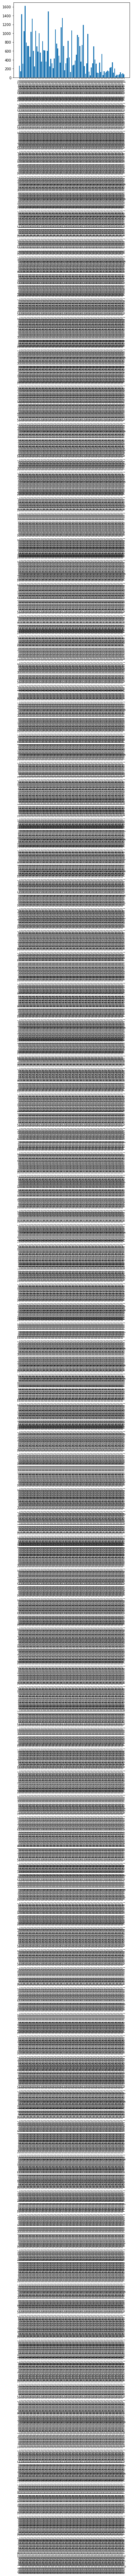

In [9]:
plt.bar(range(len(fire_dict)), fire_dict.values(), tick_label=fire_dict.keys())
plt.xticks(rotation='vertical')
plt.show()